In [7]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
from scipy import signal
import pickle
import statistics
from IPython.display import display, HTML

In [8]:
# movietitles   = ['twomen','bridgeville','pockets','overcome','inception','socialnet','oceans11','testretest',
#                'flower','hotel','garden','dreary','homealone','brockovich','starwars']
# movielength   = [245, 221, 188, 63, 228, 259, 250, 83, 180, 185, 203, 143, 234, 231, 255]  # from /Users/ziweizhang/Downloads/HCP7T_online/rawdata/datacompile.py



directory     = '/Users/ziweizhang/Downloads/HCP37T_LL/data/behav/' # change this
with open(directory+'rawdata.pkl', 'rb') as f:
    rawdata = pickle.load(f)

In [9]:
#rawdata

In [10]:
rawdata.keys()

dict_keys(['Engagement', 'Arousal', 'Valence', 'SocialInteraction', 'Focus', 'Curiosity', 'Relatability', 'Importance', 'Surprise', 'Comprehension', 'Boredom'])

## Read Comprehension data for all clips


In [11]:
Comprehension = rawdata.get("Comprehension")
Comprehension

{'twomen': array([[10., 10., 10., ..., 10., 10., 10.],
        [10., 10., 10., ..., 14., 14., 14.],
        [10., 10., 10., ...,  6.,  6.,  6.],
        ...,
        [10., 10., 10., ..., 20., 20., 20.],
        [10., 10., 10., ..., 13., 13., 13.],
        [10., 10., 10., ...,  1.,  1.,  1.]]),
 'bridgeville': array([[10., 10., 10., ..., 20., 20., 20.],
        [10., 10., 10., ..., 20., 20., 20.],
        [10., 10., 10., ...,  7.,  7.,  7.],
        ...,
        [10., 10., 10., ..., 20., 20., 20.],
        [10., 10., 10., ...,  7.,  7.,  7.],
        [10., 10., 10., ..., 20., 20., 20.]]),
 'pockets': array([[10., 10., 10., ..., 15., 15., 15.],
        [10., 10., 10., ..., 20., 20., 20.],
        [10., 10., 10., ...,  6.,  6.,  6.],
        ...,
        [10., 10., 10., ..., 20., 20., 20.],
        [10., 10., 10., ..., 15., 15., 15.],
        [10., 10., 10., ..., 19., 19., 19.]]),
 'overcome': array([[10., 10., 10., ..., 20., 20., 20.],
        [10., 10., 10., ...,  7.,  7.,  7.],
       

### Take a look at the length before doing anything

In [12]:
Comprehension.get("twomen").shape[1]

285000

In [13]:
Comprehension.get("bridgeville").shape[1]

241000

In [14]:
Comprehension.get("pockets").shape[1]

208000

In [15]:
Comprehension.get("overcome").shape[1]

83000

In [16]:
Comprehension.get("inception").shape[1]

268000

In [17]:
Comprehension.get("socialnet").shape[1]

279000

In [18]:
Comprehension.get("oceans11").shape[1]

270000

In [19]:
Comprehension.get("testretest").shape[1]

103000

In [20]:
Comprehension.get("flower").shape[1]

220000

In [21]:
Comprehension.get("hotel").shape[1]

205000

In [22]:
Comprehension.get("garden").shape[1]

223000

In [23]:
Comprehension.get("dreary").shape[1]

163000

In [24]:
Comprehension.get("homealone").shape[1]

274000

In [25]:
Comprehension.get("brockovich").shape[1]

251000

In [26]:
Comprehension.get("starwars").shape[1]

275000

# Cut Rest from the end (start if the first video)

## Movie 1

In [27]:
twomen = Comprehension.get("twomen")[:,range(20000,Comprehension.get("twomen").shape[1]-20000)]
twomen.shape

(18, 245000)

In [28]:
bridgeville = Comprehension.get("bridgeville")[:,range(0,Comprehension.get("bridgeville").shape[1]-20000)]
bridgeville.shape

(18, 221000)

In [29]:
pockets = Comprehension.get("pockets")[:,range(0,Comprehension.get("pockets").shape[1]-20000)]
pockets.shape

(18, 188000)

In [30]:
overcome = Comprehension.get("overcome")[:,range(0,Comprehension.get("overcome").shape[1]-20000)]
overcome.shape

(18, 63000)

In [31]:
inception = Comprehension.get("inception")[:,range(20000,Comprehension.get("inception").shape[1]-20000)]
inception.shape

(18, 228000)

In [32]:
socialnet = Comprehension.get("socialnet")[:,range(0,Comprehension.get("socialnet").shape[1]-20000)]
socialnet.shape

(18, 259000)

In [33]:
oceans11 = Comprehension.get("oceans11")[:,range(0,Comprehension.get("oceans11").shape[1]-20000)]
oceans11.shape

(18, 250000)

In [34]:
testretest = Comprehension.get("testretest")[:,range(0,Comprehension.get("testretest").shape[1]-20000)]
testretest.shape

(18, 83000)

In [35]:
flower = Comprehension.get("flower")[:,range(20000,Comprehension.get("flower").shape[1]-20000)]
flower.shape

(18, 180000)

In [36]:
hotel = Comprehension.get("hotel")[:,range(0,Comprehension.get("hotel").shape[1]-20000)]
hotel.shape

(18, 185000)

In [37]:
garden = Comprehension.get("garden")[:,range(0,Comprehension.get("garden").shape[1]-20000)]
garden.shape

(18, 203000)

In [38]:
dreary = Comprehension.get("dreary")[:,range(0,Comprehension.get("dreary").shape[1]-20000)]
dreary.shape

(18, 143000)

In [39]:
homealone = Comprehension.get("homealone")[:,range(20000,Comprehension.get("homealone").shape[1]-20000)]
homealone.shape

(18, 234000)

In [40]:
brockovich = Comprehension.get("brockovich")[:,range(0,Comprehension.get("brockovich").shape[1]-20000)]
brockovich.shape

(18, 231000)

In [41]:
starwars = Comprehension.get("starwars")[:,range(0,Comprehension.get("starwars").shape[1]-20000)]
starwars.shape

(18, 255000)

In [42]:
starwar2_first200 = pd.DataFrame(starwars).iloc[:, range(0,200)] 
starwar2_last200 = pd.DataFrame(starwars).iloc[:, range(len(pd.DataFrame(starwars).columns)-200,len(pd.DataFrame(starwars).columns))]
# display(HTML(starwar2_first200.to_html()))
# display(HTML(starwar2_last200.to_html()))


## Start plotting Comprehension time course for each movie

In [43]:
def norm_matrix_clips(clips_data):
    # make sure clips_data is a list of arrays for all CLIPS (not measures list for one clip)
    x_labels = ['twomen', 'bridgeville', 'pockets', 'overcome', 'inception', 'socialnet', 'oceans11', 'testretest', 'flower', 'hotel', 'garden', 'dreary', 'homealone', 'brockovich', 'starwars']
    for i,z_score in enumerate(clips_data):
        plt.matshow(z_score)
        plt.colorbar()
        plt.title(f"{x_labels[i].title()}: Continuous Responses (z-scored within subj)")
        plt.xlabel("Time")
        plt.ylabel("Subject")
        plt.show()

### Step 1: z-score Comprehension ratings within participant

In [44]:
starwars_z = pd.DataFrame(starwars).apply(lambda row: (row - row.mean()) / row.std(), axis=1)
starwars_z

,0,1,2,3,4,5,6,7,8,9,...,254990,254991,254992,254993,254994,254995,254996,254997,254998,254999
0,-6.723935,-6.723935,-6.723935,-6.723935,-6.723935,-6.723935,-6.723935,-6.723935,-6.723935,-6.723935,...,0.158755,0.158755,0.158755,0.158755,0.158755,0.158755,0.158755,0.158755,0.158755,0.158755
1,-2.906192,-2.906192,-2.906192,-2.906192,-2.906192,-2.906192,-2.906192,-2.906192,-2.906192,-2.906192,...,0.452211,0.452211,0.452211,0.452211,0.452211,0.452211,0.452211,0.452211,0.452211,0.452211
2,-1.319645,-1.319645,-1.319645,-1.319645,-1.319645,-1.319645,-1.319645,-1.319645,-1.319645,-1.319645,...,0.908346,0.908346,0.908346,0.908346,0.908346,0.908346,0.908346,0.908346,0.908346,0.908346
3,2.394495,2.394495,2.394495,2.394495,2.394495,2.394495,2.394495,2.394495,2.394495,2.394495,...,0.526787,0.526787,0.526787,0.526787,0.526787,0.526787,0.526787,0.526787,0.526787,0.526787
4,-1.761786,-1.761786,-1.761786,-1.761786,-1.761786,-1.761786,-1.761786,-1.761786,-1.761786,-1.761786,...,0.835604,0.835604,0.835604,0.835604,0.835604,0.835604,0.835604,0.835604,0.835604,0.835604
5,2.774601,2.774601,2.774601,2.774601,2.774601,2.774601,2.774601,2.774601,2.774601,2.774601,...,0.974477,0.974477,0.974477,0.974477,0.974477,0.974477,0.974477,0.974477,0.974477,0.974477
6,-3.251549,-3.251549,-3.251549,-3.251549,-3.251549,-3.251549,-3.251549,-3.251549,-3.251549,-3.251549,...,-0.791395,-0.791395,-0.791395,-0.791395,-0.791395,-0.791395,-0.791395,-0.791395,-0.791395,-0.791395
7,1.457170,1.457170,1.457170,1.457170,1.457170,1.457170,1.457170,1.457170,1.457170,1.457170,...,1.872923,1.872923,1.872923,1.872923,1.872923,1.872923,1.872923,1.872923,1.872923,1.872923
8,-0.602796,-0.602796,-0.602796,-0.602796,-0.602796,-0.602796,-0.602796,-0.602796,-0.602796,-0.602796,...,0.646631,0.646631,0.646631,0.646631,0.646631,0.646631,0.646631,0.646631,0.646631,0.646631
9,-2.002990,-2.002990,-2.002990,-2.002990,-2.002990,-2.002990,-2.002990,-2.002990,-2.002990,-2.002990,...,1.040386,1.040386,1.040386,1.040386,1.040386,1.040386,1.040386,1.040386,1.040386,1.040386


In [45]:
twomen_z = pd.DataFrame(twomen).apply(lambda row: (row - row.mean()) / row.std(), axis=1)
bridgeville_z = pd.DataFrame(bridgeville).apply(lambda row: (row - row.mean()) / row.std(), axis=1)
pockets_z = pd.DataFrame(pockets).apply(lambda row: (row - row.mean()) / row.std(), axis=1)
overcome_z = pd.DataFrame(overcome).apply(lambda row: (row - row.mean()) / row.std(), axis=1)
inception_z = pd.DataFrame(inception).apply(lambda row: (row - row.mean()) / row.std(), axis=1)
socialnet_z = pd.DataFrame(socialnet).apply(lambda row: (row - row.mean()) / row.std(), axis=1)
oceans11_z = pd.DataFrame(oceans11).apply(lambda row: (row - row.mean()) / row.std(), axis=1)
testretest_z = pd.DataFrame(testretest).apply(lambda row: (row - row.mean()) / row.std(), axis=1)
flower_z = pd.DataFrame(flower).apply(lambda row: (row - row.mean()) / row.std(), axis=1)
hotel_z = pd.DataFrame(hotel).apply(lambda row: (row - row.mean()) / row.std(), axis=1)
garden_z = pd.DataFrame(garden).apply(lambda row: (row - row.mean()) / row.std(), axis=1)
dreary_z = pd.DataFrame(dreary).apply(lambda row: (row - row.mean()) / row.std(), axis=1)
homealone_z = pd.DataFrame(homealone).apply(lambda row: (row - row.mean()) / row.std(), axis=1)
brockovich_z = pd.DataFrame(brockovich).apply(lambda row: (row - row.mean()) / row.std(), axis=1)

In [46]:
starwars_z.iloc[0]

0        -6.723935
1        -6.723935
2        -6.723935
3        -6.723935
4        -6.723935
            ...   
254995    0.158755
254996    0.158755
254997    0.158755
254998    0.158755
254999    0.158755
Name: 0, Length: 255000, dtype: float64

<AxesSubplot: >

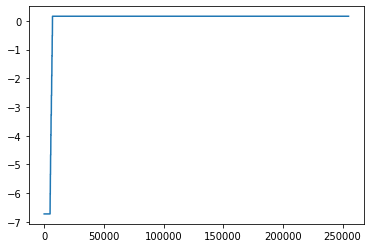

In [47]:
starwars_z.iloc[0].plot.line()
# plt.colorbar()
# plt.title(f"{x_labels[i].title()}: Continuous Responses (z-scored within subj)")
# plt.xlabel("Time")
# plt.ylabel("Subject")
# plt.show()

Text(0.5, 1.0, 'z-scored within twomen')

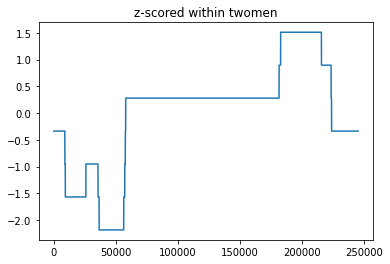

In [48]:
twomen_z.iloc[0].plot.line()
plt.title("z-scored within twomen")


Text(0.5, 1.0, 'z-scored within bridgeville')

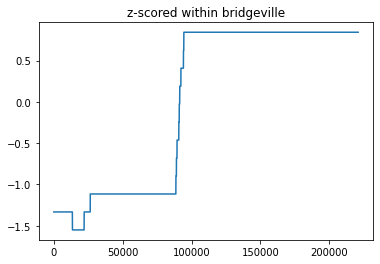

In [49]:
bridgeville_z.iloc[0].plot.line()
plt.title("z-scored within bridgeville")


Text(0.5, 1.0, 'z-scored within pockets')

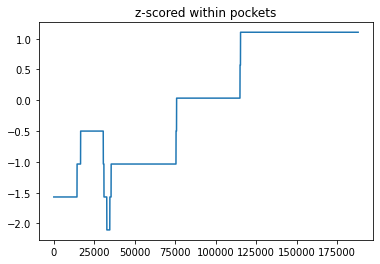

In [50]:
pockets_z.iloc[0].plot.line()
plt.title("z-scored within pockets")


Text(0.5, 1.0, 'z-scored within overcome')

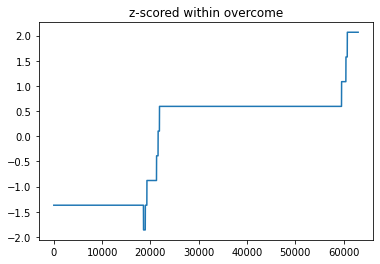

In [51]:
overcome_z.iloc[0].plot.line()
plt.title("z-scored within overcome")



Text(0.5, 1.0, 'z-scored within inception')

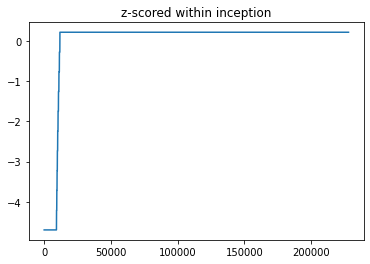

In [52]:
inception_z.iloc[0].plot.line()
plt.title("z-scored within inception")



Text(0.5, 1.0, 'z-scored within socialnet')

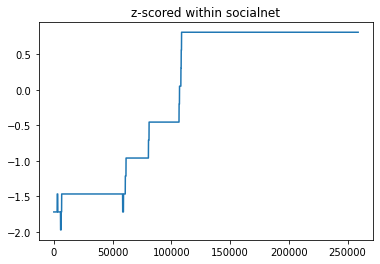

In [53]:
socialnet_z.iloc[0].plot.line()
plt.title("z-scored within socialnet")



Text(0.5, 1.0, 'z-scored within oceans11')

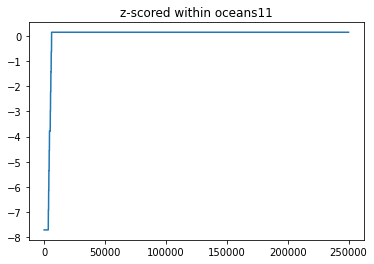

In [54]:
oceans11_z.iloc[0].plot.line()
plt.title("z-scored within oceans11")



Text(0.5, 1.0, 'z-scored within testretest')

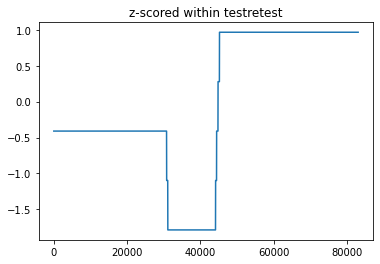

In [55]:
testretest_z.iloc[0].plot.line()
plt.title("z-scored within testretest")



Text(0.5, 1.0, 'z-scored within flower')

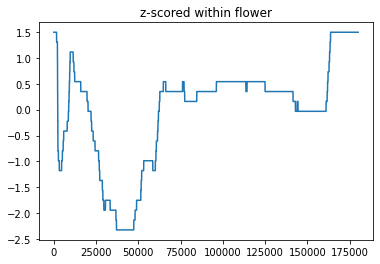

In [56]:
flower_z.iloc[0].plot.line()
plt.title("z-scored within flower")



Text(0.5, 1.0, 'z-scored within hotel')

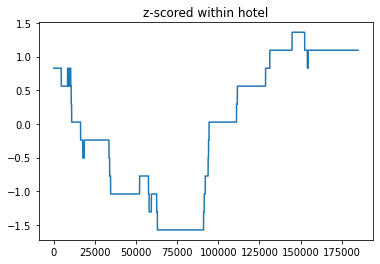

In [57]:
hotel_z.iloc[0].plot.line()
plt.title("z-scored within hotel")



Text(0.5, 1.0, 'z-scored within garden')

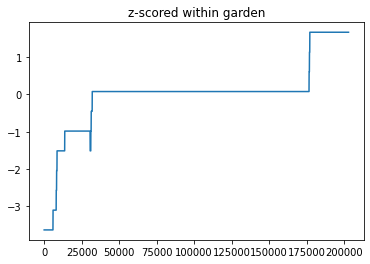

In [58]:
garden_z.iloc[0].plot.line()
plt.title("z-scored within garden")



Text(0.5, 1.0, 'z-scored within dreary')

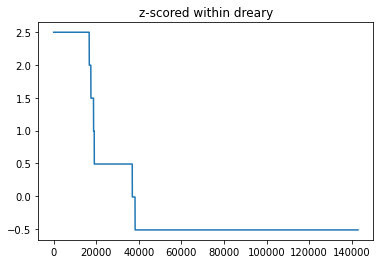

In [59]:
dreary_z.iloc[0].plot.line()
plt.title("z-scored within dreary")



Text(0.5, 1.0, 'z-scored within homealone')

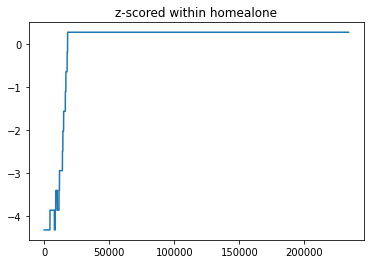

In [60]:
homealone_z.iloc[0].plot.line()
plt.title("z-scored within homealone")



Text(0.5, 1.0, 'z-scored within brockovich')

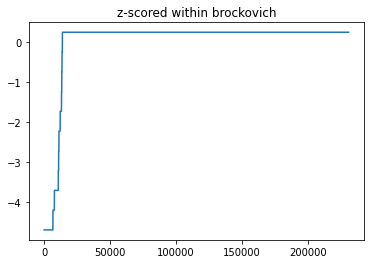

In [61]:
brockovich_z.iloc[0].plot.line()
plt.title("z-scored within brockovich")

### Step 2: averge the z-score Comprehension ratings across participants to get group average

This is the final time course we need

In [62]:
starwars_z_mean = starwars_z.mean(axis=0)

starwars_z_mean

0        -1.284905
1        -1.284905
2        -1.284905
3        -1.284905
4        -1.284905
            ...   
254995    0.807868
254996    0.807868
254997    0.807868
254998    0.807868
254999    0.807868
Length: 255000, dtype: float64

In [63]:
twomen_z_mean = twomen_z.mean(axis=0)
bridgeville_z_mean = bridgeville_z.mean(axis=0)
pockets_z_mean = pockets_z.mean(axis=0)
overcome_z_mean = overcome_z.mean(axis=0)
inception_z_mean = inception_z.mean(axis=0)
socialnet_z_mean = socialnet_z.mean(axis=0)
oceans11_z_mean = oceans11_z.mean(axis=0)
testretest_z_mean = testretest_z.mean(axis=0)
flower_z_mean = flower_z.mean(axis=0)
hotel_z_mean = hotel_z.mean(axis=0)
garden_z_mean = garden_z.mean(axis=0)
dreary_z_mean = dreary_z.mean(axis=0)
homealone_z_mean = homealone_z.mean(axis=0)
brockovich_z_mean = brockovich_z.mean(axis=0)

### Plot the mean of each clip

In [64]:
twomen_z_mean


0         0.805949
1         0.805949
2         0.805949
3         0.805949
4         0.805949
            ...   
244995    0.484192
244996    0.484192
244997    0.484192
244998    0.484192
244999    0.484192
Length: 245000, dtype: float64

Text(0.5, 1.0, 'z-scored within subject, group mean, inception')

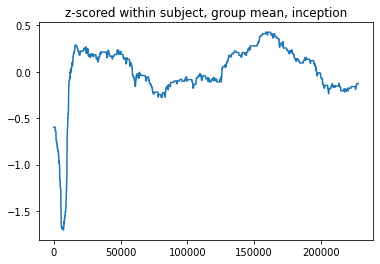

In [65]:
inception_z_mean.plot.line()
plt.title("z-scored within subject, group mean, inception")

Text(0.5, 1.0, 'z-scored within subject, group mean, twomen')

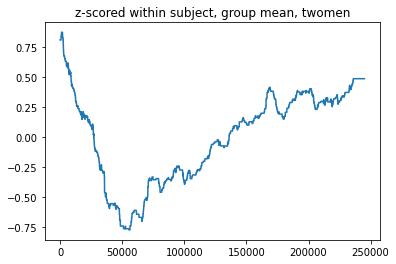

In [66]:
twomen_z_mean.plot.line()
plt.title("z-scored within subject, group mean, twomen")


Text(0.5, 1.0, 'z-scored within subject, group mean, bridgeville')

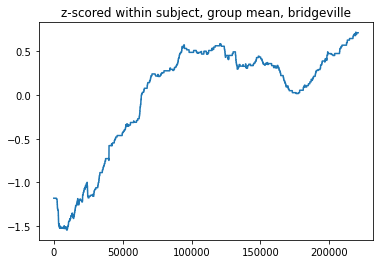

In [67]:
bridgeville_z_mean.plot.line()
plt.title("z-scored within subject, group mean, bridgeville")


Text(0.5, 1.0, 'z-scored within subject, group mean, pockets')

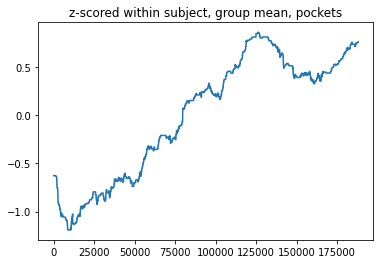

In [68]:
pockets_z_mean.plot.line()
plt.title("z-scored within subject, group mean, pockets")


Text(0.5, 1.0, 'z-scored within subject, group mean, overcome')

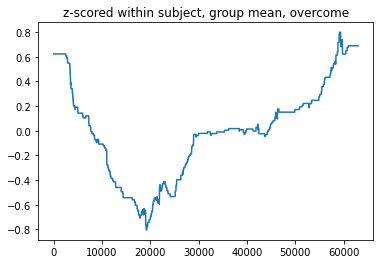

In [69]:
overcome_z_mean.plot.line()
plt.title("z-scored within subject, group mean, overcome")


Text(0.5, 1.0, 'z-scored within subject, group mean, socialnet')

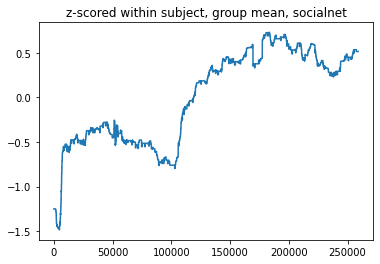

In [70]:
socialnet_z_mean.plot.line()
plt.title("z-scored within subject, group mean, socialnet")


Text(0.5, 1.0, 'z-scored within subject, group mean, oceans11')

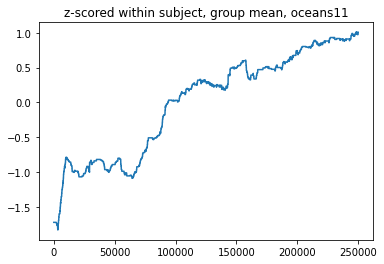

In [71]:
oceans11_z_mean.plot.line()
plt.title("z-scored within subject, group mean, oceans11")


Text(0.5, 1.0, 'z-scored within subject, group mean, testretest')

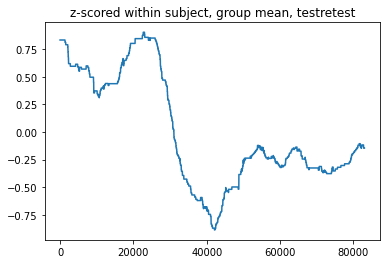

In [72]:
testretest_z_mean.plot.line()
plt.title("z-scored within subject, group mean, testretest")


Text(0.5, 1.0, 'z-scored within subject, group mean, flower')

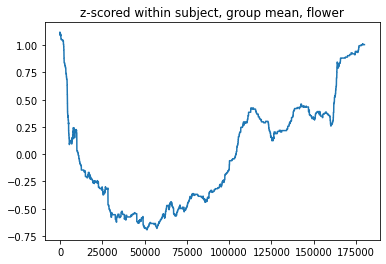

In [73]:
flower_z_mean.plot.line()
plt.title("z-scored within subject, group mean, flower")


Text(0.5, 1.0, 'z-scored within subject, group mean, hotel')

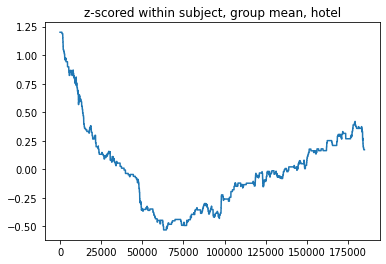

In [74]:
hotel_z_mean.plot.line()
plt.title("z-scored within subject, group mean, hotel")


Text(0.5, 1.0, 'z-scored within subject, group mean, garden')

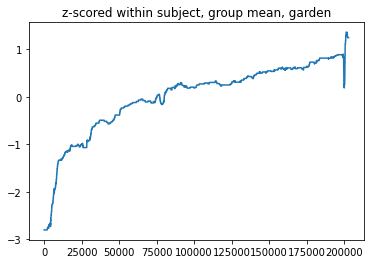

In [75]:
garden_z_mean.plot.line()
plt.title("z-scored within subject, group mean, garden")


Text(0.5, 1.0, 'z-scored within subject, group mean, dreary')

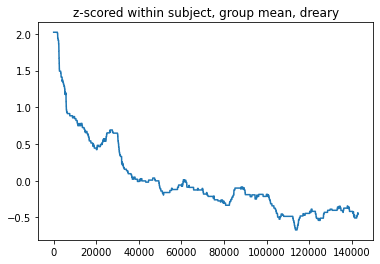

In [76]:
dreary_z_mean.plot.line()
plt.title("z-scored within subject, group mean, dreary")


Text(0.5, 1.0, 'z-scored within subject, group mean, homealone')

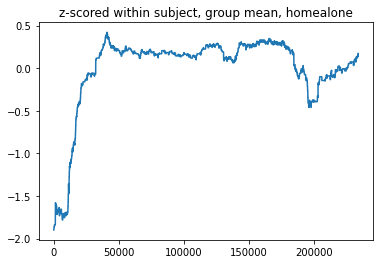

In [77]:
homealone_z_mean.plot.line()
plt.title("z-scored within subject, group mean, homealone")


Text(0.5, 1.0, 'z-scored within subject, group mean, brockovich')

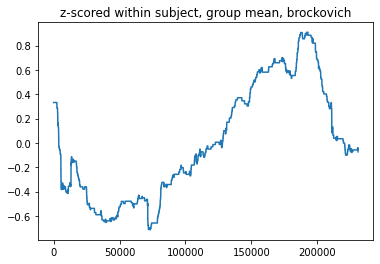

In [78]:
brockovich_z_mean.plot.line()
plt.title("z-scored within subject, group mean, brockovich")


Text(0.5, 1.0, 'z-scored within subject, group mean, starwars')

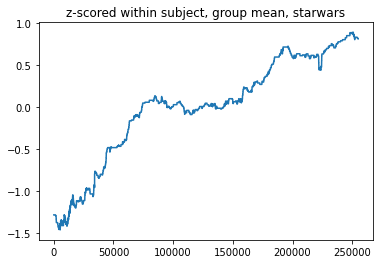

In [79]:
starwars_z_mean.plot.line()
plt.title("z-scored within subject, group mean, starwars")

## Sample behavioral ratings to match brain data (TR=1000ms)

Calculate the mean of the mean z-scored group level Comprehension rating in every 1000ms window
link to paper with movie clip description: https://www.sciencedirect.com/science/article/pii/S1053811921002408#sec0002


In [80]:
starwars_z_mean.shape

(255000,)

Text(0.5, 1.0, '1000ms windows mean, z-scored within subject, group mean, starwars')

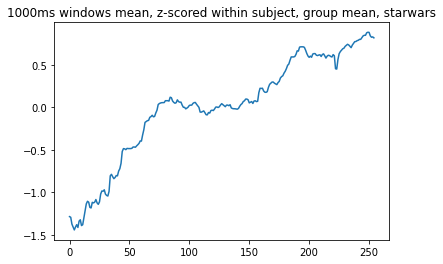

In [81]:
starwars_data = np.array(starwars_z_mean) # Step 1: Convert to numpy array

# Step 2: Reshape to 1000 columns, each representing 1ms in the 1000ms window.
reshaped_starwars_z_mean = starwars_data.reshape(-1, 1000) # This creates 255 rows by 1000 columns

# Step 3: Calculate the mean for each 1000ms window (i.e., along the columns)
mean_starwars_z_mean = reshaped_starwars_z_mean.mean(axis=1)
# Now, 'mean_satrwars_z_mean' is a numpy array with the mean for each 1000ms window.

plt.plot(mean_starwars_z_mean) 
plt.title("1000ms windows mean, z-scored within subject, group mean, starwars")

length (245,)


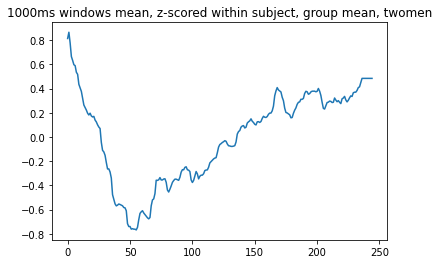

In [82]:
twomen_data = np.array(twomen_z_mean) # Step 1: Convert to numpy array

# Step 2: Reshape to 1000 columns, each representing 1ms in the 1000ms window.
reshaped_twomen_z_mean = twomen_data.reshape(-1, 1000) # This creates 255 rows by 1000 columns

# Step 3: Calculate the mean for each 1000ms window (i.e., along the columns)
mean_twomen_z_mean = reshaped_twomen_z_mean.mean(axis=1)
# Now, 'mean_twomen_z_mean' is a numpy array with the mean for each 1000ms window.

plt.plot(mean_twomen_z_mean) 
plt.title("1000ms windows mean, z-scored within subject, group mean, twomen")
print('length', np.shape(mean_twomen_z_mean))

length (221,)


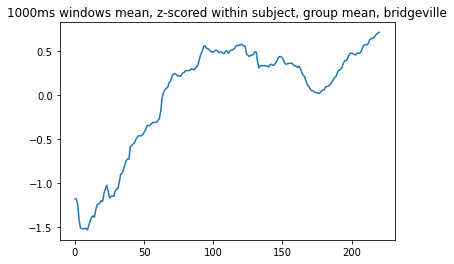

In [83]:
bridgeville_data = np.array(bridgeville_z_mean) # Step 1: Convert to numpy array

# Step 2: Reshape to 1000 columns, each representing 1ms in the 1000ms window.
reshaped_bridgeville_z_mean = bridgeville_data.reshape(-1, 1000) # This creates 255 rows by 1000 columns

# Step 3: Calculate the mean for each 1000ms window (i.e., along the columns)
mean_bridgeville_z_mean = reshaped_bridgeville_z_mean.mean(axis=1)
# Now, 'mean_bridgeville_z_mean' is a numpy array with the mean for each 1000ms window.

plt.plot(mean_bridgeville_z_mean) 
plt.title("1000ms windows mean, z-scored within subject, group mean, bridgeville")
print('length', np.shape(mean_bridgeville_z_mean))

length (188,)


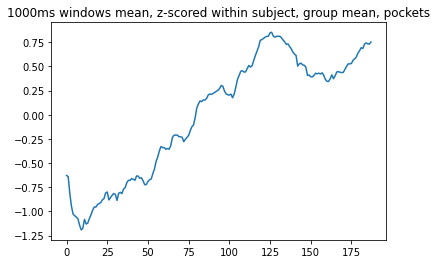

In [84]:
pockets_data = np.array(pockets_z_mean) # Step 1: Convert to numpy array

# Step 2: Reshape to 1000 columns, each representing 1ms in the 1000ms window.
reshaped_pockets_z_mean = pockets_data.reshape(-1, 1000) # This creates 255 rows by 1000 columns

# Step 3: Calculate the mean for each 1000ms window (i.e., along the columns)
mean_pockets_z_mean = reshaped_pockets_z_mean.mean(axis=1)
# Now, 'mean_pockets_z_mean' is a numpy array with the mean for each 1000ms window.

plt.plot(mean_pockets_z_mean) 
plt.title("1000ms windows mean, z-scored within subject, group mean, pockets")
print('length', np.shape(mean_pockets_z_mean))

length (63,)


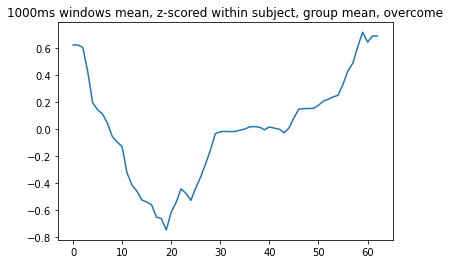

In [85]:
overcome_data = np.array(overcome_z_mean) # Step 1: Convert to numpy array

# Step 2: Reshape to 1000 columns, each representing 1ms in the 1000ms window.
reshaped_overcome_z_mean = overcome_data.reshape(-1, 1000) # This creates 255 rows by 1000 columns

# Step 3: Calculate the mean for each 1000ms window (i.e., along the columns)
mean_overcome_z_mean = reshaped_overcome_z_mean.mean(axis=1)
# Now, 'mean_overcome_z_mean' is a numpy array with the mean for each 1000ms window.

plt.plot(mean_overcome_z_mean) 
plt.title("1000ms windows mean, z-scored within subject, group mean, overcome")
print('length', np.shape(mean_overcome_z_mean))

length (228,)


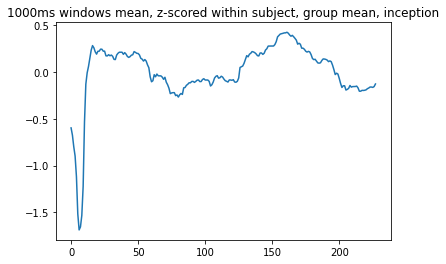

In [86]:
inception_data = np.array(inception_z_mean) # Step 1: Convert to numpy array

# Step 2: Reshape to 1000 columns, each representing 1ms in the 1000ms window.
reshaped_inception_z_mean = inception_data.reshape(-1, 1000) # This creates 255 rows by 1000 columns

# Step 3: Calculate the mean for each 1000ms window (i.e., along the columns)
mean_inception_z_mean = reshaped_inception_z_mean.mean(axis=1)
# Now, 'mean_inception_z_mean' is a numpy array with the mean for each 1000ms window.

plt.plot(mean_inception_z_mean) 
plt.title("1000ms windows mean, z-scored within subject, group mean, inception")
print('length', np.shape(mean_inception_z_mean))

length (259,)


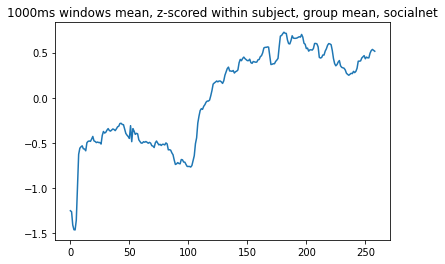

In [87]:
socialnet_data = np.array(socialnet_z_mean) # Step 1: Convert to numpy array

# Step 2: Reshape to 1000 columns, each representing 1ms in the 1000ms window.
reshaped_socialnet_z_mean = socialnet_data.reshape(-1, 1000) # This creates 255 rows by 1000 columns

# Step 3: Calculate the mean for each 1000ms window (i.e., along the columns)
mean_socialnet_z_mean = reshaped_socialnet_z_mean.mean(axis=1)
# Now, 'mean_socialnet_z_mean' is a numpy array with the mean for each 1000ms window.

plt.plot(mean_socialnet_z_mean) 
plt.title("1000ms windows mean, z-scored within subject, group mean, socialnet")
print('length', np.shape(mean_socialnet_z_mean))

length (250,)


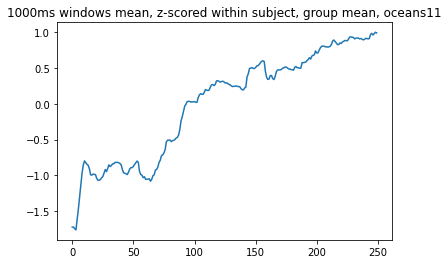

In [88]:
oceans11_data = np.array(oceans11_z_mean) # Step 1: Convert to numpy array

# Step 2: Reshape to 1000 columns, each representing 1ms in the 1000ms window.
reshaped_oceans11_z_mean = oceans11_data.reshape(-1, 1000) # This creates 255 rows by 1000 columns

# Step 3: Calculate the mean for each 1000ms window (i.e., along the columns)
mean_oceans11_z_mean = reshaped_oceans11_z_mean.mean(axis=1)
# Now, 'mean_oceans11_z_mean' is a numpy array with the mean for each 1000ms window.

plt.plot(mean_oceans11_z_mean) 
plt.title("1000ms windows mean, z-scored within subject, group mean, oceans11")
print('length', np.shape(mean_oceans11_z_mean))

length (83,)


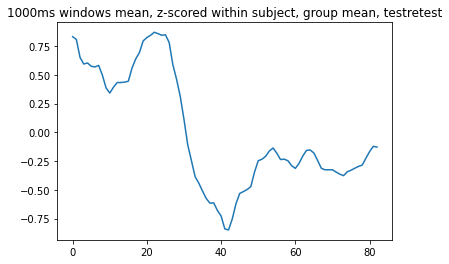

In [89]:
testretest_data = np.array(testretest_z_mean) # Step 1: Convert to numpy array

# Step 2: Reshape to 1000 columns, each representing 1ms in the 1000ms window.
reshaped_testretest_z_mean = testretest_data.reshape(-1, 1000) # This creates 255 rows by 1000 columns

# Step 3: Calculate the mean for each 1000ms window (i.e., along the columns)
mean_testretest_z_mean = reshaped_testretest_z_mean.mean(axis=1)
# Now, 'mean_testretest_z_mean' is a numpy array with the mean for each 1000ms window.

plt.plot(mean_testretest_z_mean) 
plt.title("1000ms windows mean, z-scored within subject, group mean, testretest")
print('length', np.shape(mean_testretest_z_mean))

length (180,)


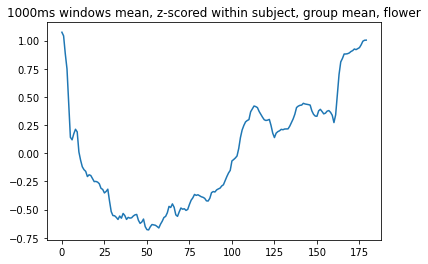

In [90]:
flower_data = np.array(flower_z_mean) # Step 1: Convert to numpy array

# Step 2: Reshape to 1000 columns, each representing 1ms in the 1000ms window.
reshaped_flower_z_mean = flower_data.reshape(-1, 1000) # This creates 255 rows by 1000 columns

# Step 3: Calculate the mean for each 1000ms window (i.e., along the columns)
mean_flower_z_mean = reshaped_flower_z_mean.mean(axis=1)
# Now, 'mean_flower_z_mean' is a numpy array with the mean for each 1000ms window.

plt.plot(mean_flower_z_mean) 
plt.title("1000ms windows mean, z-scored within subject, group mean, flower")
print('length', np.shape(mean_flower_z_mean))

length (185,)


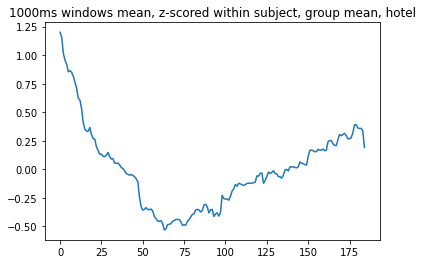

In [91]:
hotel_data = np.array(hotel_z_mean) # Step 1: Convert to numpy array

# Step 2: Reshape to 1000 columns, each representing 1ms in the 1000ms window.
reshaped_hotel_z_mean = hotel_data.reshape(-1, 1000) # This creates 255 rows by 1000 columns

# Step 3: Calculate the mean for each 1000ms window (i.e., along the columns)
mean_hotel_z_mean = reshaped_hotel_z_mean.mean(axis=1)
# Now, 'mean_hotel_z_mean' is a numpy array with the mean for each 1000ms window.

plt.plot(mean_hotel_z_mean) 
plt.title("1000ms windows mean, z-scored within subject, group mean, hotel")
print('length', np.shape(mean_hotel_z_mean))

length (203,)


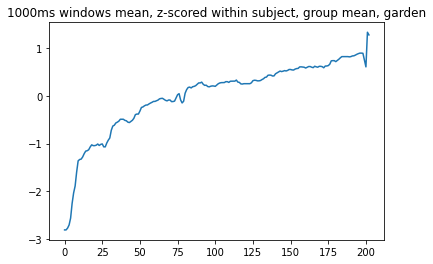

In [92]:
garden_data = np.array(garden_z_mean) # Step 1: Convert to numpy array

# Step 2: Reshape to 1000 columns, each representing 1ms in the 1000ms window.
reshaped_garden_z_mean = garden_data.reshape(-1, 1000) # This creates 255 rows by 1000 columns

# Step 3: Calculate the mean for each 1000ms window (i.e., along the columns)
mean_garden_z_mean = reshaped_garden_z_mean.mean(axis=1)
# Now, 'mean_garden_z_mean' is a numpy array with the mean for each 1000ms window.

plt.plot(mean_garden_z_mean) 
plt.title("1000ms windows mean, z-scored within subject, group mean, garden")
print('length', np.shape(mean_garden_z_mean))

length (143,)


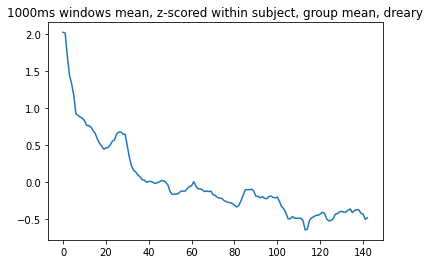

In [93]:
dreary_data = np.array(dreary_z_mean) # Step 1: Convert to numpy array

# Step 2: Reshape to 1000 columns, each representing 1ms in the 1000ms window.
reshaped_dreary_z_mean = dreary_data.reshape(-1, 1000) # This creates 255 rows by 1000 columns

# Step 3: Calculate the mean for each 1000ms window (i.e., along the columns)
mean_dreary_z_mean = reshaped_dreary_z_mean.mean(axis=1)
# Now, 'mean_dreary_z_mean' is a numpy array with the mean for each 1000ms window.

plt.plot(mean_dreary_z_mean) 
plt.title("1000ms windows mean, z-scored within subject, group mean, dreary")
print('length', np.shape(mean_dreary_z_mean))

length (234,)


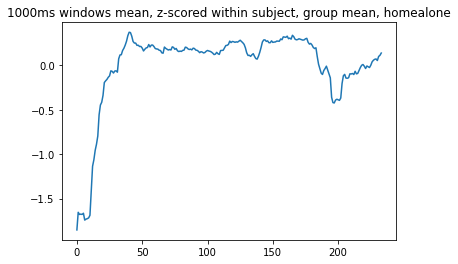

In [94]:
homealone_data = np.array(homealone_z_mean) # Step 1: Convert to numpy array

# Step 2: Reshape to 1000 columns, each representing 1ms in the 1000ms window.
reshaped_homealone_z_mean = homealone_data.reshape(-1, 1000) # This creates 255 rows by 1000 columns

# Step 3: Calculate the mean for each 1000ms window (i.e., along the columns)
mean_homealone_z_mean = reshaped_homealone_z_mean.mean(axis=1)
# Now, 'mean_homealone_z_mean' is a numpy array with the mean for each 1000ms window.

plt.plot(mean_homealone_z_mean) 
plt.title("1000ms windows mean, z-scored within subject, group mean, homealone")
print('length', np.shape(mean_homealone_z_mean))

length (231,)


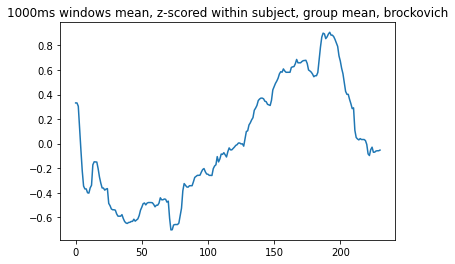

In [95]:
brockovich_data = np.array(brockovich_z_mean) # Step 1: Convert to numpy array

# Step 2: Reshape to 1000 columns, each representing 1ms in the 1000ms window.
reshaped_brockovich_z_mean = brockovich_data.reshape(-1, 1000) # This creates 255 rows by 1000 columns

# Step 3: Calculate the mean for each 1000ms window (i.e., along the columns)
mean_brockovich_z_mean = reshaped_brockovich_z_mean.mean(axis=1)
# Now, 'mean_brockovich_z_mean' is a numpy array with the mean for each 1000ms window.

plt.plot(mean_brockovich_z_mean) 
plt.title("1000ms windows mean, z-scored within subject, group mean, brockovich")
print('length', np.shape(mean_brockovich_z_mean))

## Concatenate all movie clips

In [96]:
movie1_titles = np.concatenate([mean_twomen_z_mean,mean_bridgeville_z_mean,mean_pockets_z_mean,mean_overcome_z_mean])
                 
movie2_titles = np.concatenate([mean_inception_z_mean,mean_socialnet_z_mean,mean_oceans11_z_mean,mean_testretest_z_mean])
                 
movie3_titles = np.concatenate([mean_flower_z_mean,mean_hotel_z_mean,mean_garden_z_mean,mean_dreary_z_mean])

movie4_titles = np.concatenate([mean_homealone_z_mean,mean_brockovich_z_mean,mean_starwars_z_mean])



In [97]:
print(np.shape(movie1_titles),np.shape(movie2_titles),np.shape(movie3_titles),np.shape(movie4_titles))

(717,) (820,) (711,) (720,)


In [98]:
timeinfo_withrest = {}
timeinfo_withrest[1] = [245 +20+20, 221 +20, 188 +20, 63 +20]
timeinfo_withrest[2] = [228 +20+20, 259 +20, 250 +20, 83 +20]
timeinfo_withrest[3] = [180 +20+20, 185 +20, 203 +20, 143 +20]
timeinfo_withrest[4] = [234 +20+20, 231 +20, 255 +20]
print(sum(timeinfo_withrest[1]),sum(timeinfo_withrest[2]),sum(timeinfo_withrest[3]),sum(timeinfo_withrest[4]))

817 920 811 800


In [99]:
timeinfo = {}
timeinfo[1] = [245, 221, 188, 63]
timeinfo[2] = [228, 259, 250, 83]
timeinfo[3] = [180, 185, 203, 143]
timeinfo[4] = [234, 231, 255]
print(sum(timeinfo[1]),sum(timeinfo[2]),sum(timeinfo[3]),sum(timeinfo[4]))

717 820 711 720


In [100]:
pd.DataFrame(movie1_titles).to_csv('/Users/ziweizhang/Downloads/HCP37T_LL/output/behav_ratings/comprehension/movie1.csv',index=False)
pd.DataFrame(movie2_titles).to_csv('/Users/ziweizhang/Downloads/HCP37T_LL/output/behav_ratings/comprehension/movie2.csv',index=False)
pd.DataFrame(movie3_titles).to_csv('/Users/ziweizhang/Downloads/HCP37T_LL/output/behav_ratings/comprehension/movie3.csv',index=False)
pd.DataFrame(movie4_titles).to_csv('/Users/ziweizhang/Downloads/HCP37T_LL/output/behav_ratings/comprehension/movie4.csv',index=False)
